# Large Feature Selection

In [1]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution, plot_histogram_k_features_hof
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np


c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create a custom dataset with huge number of features
Output only depends on the first features


In [2]:
data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 19_996))

X = np.hstack((X, noise))
X.shape

(150, 20000)

### Split the training and test data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Define the GAFeatureSelectionCV options

You can check with ``use_numpy_array=False`` and compare speed execution

In [4]:
clf = SVC()

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=5,
    crossover_probability=0.5,
    mutation_probability=0.5,
    max_features=256,
    population_size=250,
    generations=20,
    n_jobs=-1,
    tournament_size=5,
    verbose=True,
    elitism=True,
    use_numpy_array=True,
    keep_top_k=150
)

### Fit the model and see some results

In [5]:
evolved_estimator.fit(X_train, y_train)
features = evolved_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	250   	0.3418 	0.0464538  	0.5        	0.2        
1  	500   	0.40416	0.0346106  	0.5        	0.33       
2  	500   	0.43948	0.0321143  	0.55       	0.36       
3  	500   	0.4704 	0.0331397  	0.57       	0.4        
4  	500   	0.49692	0.0301283  	0.57       	0.41       
5  	500   	0.52596	0.0286649  	0.6        	0.43       
6  	500   	0.55164	0.0265351  	0.62       	0.46       
7  	500   	0.57116	0.0265303  	0.66       	0.46       
8  	500   	0.59468	0.0340367  	0.74       	0.5        
9  	500   	0.61304	0.0370238  	0.74       	0.51       
10 	500   	0.63716	0.0403328  	0.74       	0.49       
11 	500   	0.66276	0.0400198  	0.75       	0.52       
12 	500   	0.6844 	0.039998   	0.75       	0.56       
13 	500   	0.7014 	0.0337408  	0.75       	0.59       
14 	500   	0.71676	0.033863   	0.76       	0.57       
15 	500   	0.7358 	0.0224401  	0.8        	0.64       
16 	500   	0.74244	0.0183316  	0.8        	0.65       
17 	500   

<AxesSubplot: title={'center': 'Histogram of most selected features in HallOfFame'}, xlabel='count', ylabel='feature'>

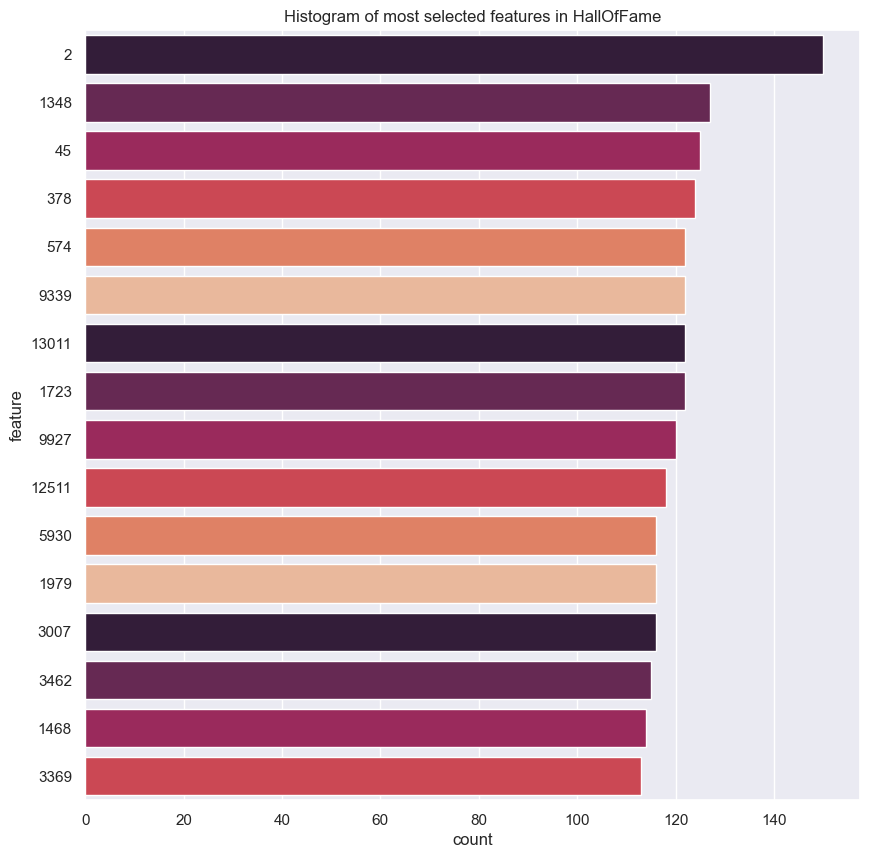

In [6]:
plot_histogram_k_features_hof(evolved_estimator)

Re-doing a feature selection to find a smaller set of features

In [9]:

clf = SVC()

new_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=5,
    scoring="accuracy",
    max_features=4,
    population_size=250,
    generations=10,
    n_jobs=-1,
    verbose=True,
    tournament_size=25,
    elitism=True,
    use_numpy_array=True
)

In [13]:
new_estimator.fit(X[:, evolved_estimator.support_], y)
features = new_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = new_estimator.predict(X_test[:, evolved_estimator.support_])
accuracy = accuracy_score(y_test, y_predict_ga)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	250   	0.36976	0.0906296  	0.846667   	0.24       
1  	500   	0.655147	0.184562   	0.866667   	0.426667   
2  	500   	0.858853	0.00655376 	0.873333   	0.826667   
3  	500   	0.872373	0.0155195  	0.94       	0.86       
4  	500   	0.907707	0.0265562  	0.94       	0.866667   
5  	500   	0.940267	0.00468757 	0.96       	0.9        
6  	500   	0.94424 	0.0081745  	0.96       	0.94       
7  	500   	0.958853	0.00445429 	0.96       	0.94       
8  	500   	0.96    	2.33147e-15	0.96       	0.96       
9  	500   	0.96    	2.33147e-15	0.96       	0.96       
10 	500   	0.96    	2.33147e-15	0.96       	0.96       
11 	500   	0.96    	2.33147e-15	0.96       	0.96       
12 	500   	0.96    	2.33147e-15	0.96       	0.96       
13 	500   	0.96    	2.33147e-15	0.96       	0.96       
14 	500   	0.96    	2.33147e-15	0.96       	0.96       
15 	500   	0.96    	2.33147e-15	0.96       	0.96       
16 	500   	0.96    	2.33147e-15	0.96       	0.96  

In [14]:
#Best features found
print(new_estimator.support_)
print("accuracy score: ", "{:.2f}".format(accuracy))

[ 0 91]
accuracy score:  0.96


In [15]:
evolved_estimator.support_[new_estimator.support_]

Individual([    2, 10854])

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn_genetic\plots.py:77: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\sklearn_genetic\plots.py:77: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


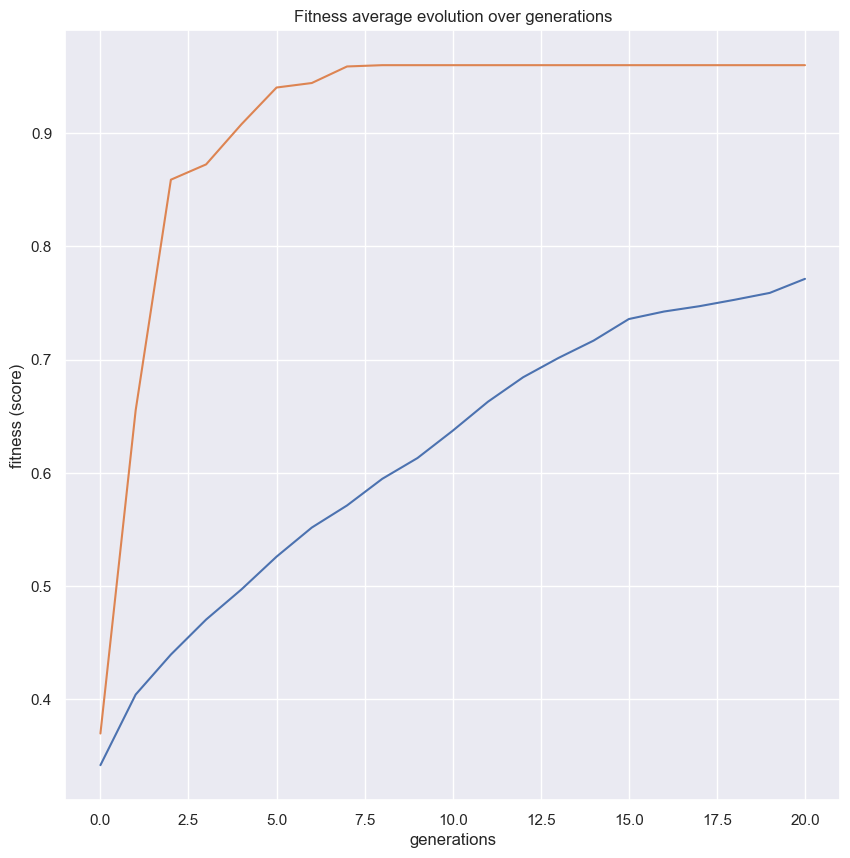

In [16]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plot = plot_fitness_evolution(new_estimator, metric="fitness")
plt.show()

# SVC on all features

In [17]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3

# SVC on selected features

In [18]:
clf = SVC()
clf.fit(X_train[:, evolved_estimator.support_[new_estimator.support_]], y_train)
clf.score(X_test[:, evolved_estimator.support_[new_estimator.support_]], y_test)

0.84